<a href="https://colab.research.google.com/github/marathe90/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid",{'grid.linestyle': '--'})


In [ ]:
# Mount your drive and read the csv file.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Uploading & understanding of data**


In [ ]:
byke= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone project/P2/Bike.csv", encoding = "ISO-8859-1")

In [ ]:
#creating copy of the data & understanding of data
byke1=byke.copy()
byke1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
byke1.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
byke1.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
byke1.shape

(8760, 14)

In [ ]:
byke1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
byke1.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
type(byke1['Date'][1])

str

In [ ]:
byke1['Date'] = pd.to_datetime(byke1['Date'])
byke1['Date'].unique()

array(['2017-01-12T00:00:00.000000000', '2017-02-12T00:00:00.000000000',
       '2017-03-12T00:00:00.000000000', '2017-04-12T00:00:00.000000000',
       '2017-05-12T00:00:00.000000000', '2017-06-12T00:00:00.000000000',
       '2017-07-12T00:00:00.000000000', '2017-08-12T00:00:00.000000000',
       '2017-09-12T00:00:00.000000000', '2017-10-12T00:00:00.000000000',
       '2017-11-12T00:00:00.000000000', '2017-12-12T00:00:00.000000000',
       '2017-12-13T00:00:00.000000000', '2017-12-14T00:00:00.000000000',
       '2017-12-15T00:00:00.000000000', '2017-12-16T00:00:00.000000000',
       '2017-12-17T00:00:00.000000000', '2017-12-18T00:00:00.000000000',
       '2017-12-19T00:00:00.000000000', '2017-12-20T00:00:00.000000000',
       '2017-12-21T00:00:00.000000000', '2017-12-22T00:00:00.000000000',
       '2017-12-23T00:00:00.000000000', '2017-12-24T00:00:00.000000000',
       '2017-12-25T00:00:00.000000000', '2017-12-26T00:00:00.000000000',
       '2017-12-27T00:00:00.000000000', '2017-12-28

In [ ]:
byke1['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

**Renting of byke with respect to environmental conditions**

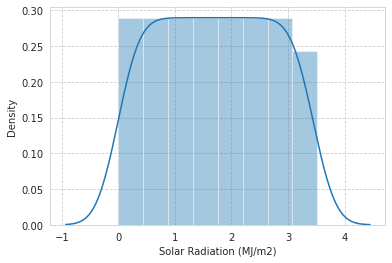

In [ ]:
byke1_rain = pd.DataFrame(byke1.groupby('Solar Radiation (MJ/m2)')['Rented Bike Count'].sum())
byke1_rain.reset_index(inplace=True)
sns.distplot(byke1_rain['Solar Radiation (MJ/m2)'])

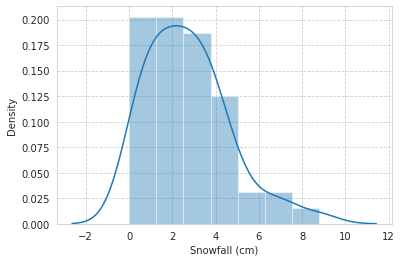

In [ ]:
byke1_rain = pd.DataFrame(byke1.groupby('Snowfall (cm)')['Rented Bike Count'].sum())
byke1_rain.reset_index(inplace=True)
sns.distplot(byke1_rain['Snowfall (cm)'])

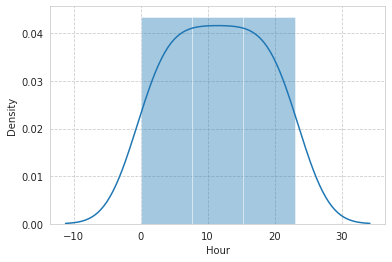

In [ ]:
byke1_rain = pd.DataFrame(byke1.groupby('Hour')['Rented Bike Count'].sum())
byke1_rain.reset_index(inplace=True)
sns.distplot(byke1_rain['Hour'])

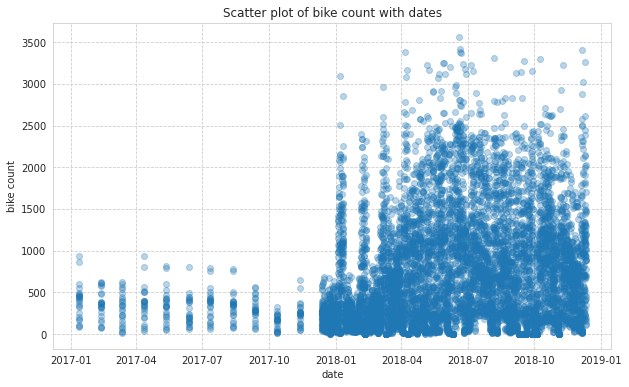

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(byke1['Date'], byke1['Rented Bike Count'], alpha=0.3)
plt.title('Scatter plot of bike count with dates')
plt.xlabel('date')
plt.ylabel('bike count')
plt.show()

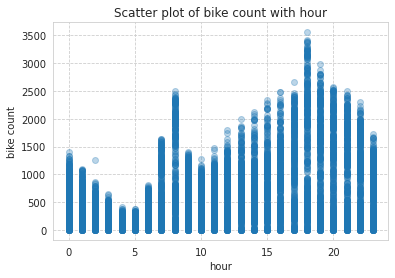

In [ ]:
plt.scatter(byke1['Hour'], byke1['Rented Bike Count'], alpha=0.3)
plt.title('Scatter plot of bike count with hour')
plt.xlabel('hour')
plt.ylabel('bike count')
plt.show()

In [ ]:
qa = byke1.quantile(0.25)
qb = byke1.quantile(0.75)
range = qb-qa
print(range)

Rented Bike Count             874.25
Hour                           11.50
Temperature(°C)                19.00
Humidity(%)                    32.00
Wind speed (m/s)                1.40
Visibility (10m)             1060.00
Dew point temperature(°C)      19.50
Solar Radiation (MJ/m2)         0.93
Rainfall(mm)                    0.00
Snowfall (cm)                   0.00
dtype: float64


In [ ]:
attributes_w = list(byke1.columns)
attributes_w = attributes_w[2:]
list_0 = ['Hour','Winter','Spring','Summer','Autumn','Holiday','Functioning Day','month','year']
attributes = [x for x in attributes_w if x not in list_0]
attributes

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons']

In [ ]:
byke1.drop(columns=['Date'],inplace=True) # drop the Date column

In [ ]:
byke1['Hour']=byke1['Hour'].astype('object') # convert Hour column integer to Categorical 

In [ ]:
numeric_attributes= byke1.select_dtypes(exclude='object')
categorical_attributes=byke1.select_dtypes(include='object')
numeric_attributes.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [ ]:
categorical_attributes.head()

,Hour,Seasons,Holiday,Functioning Day
0,0,Winter,No Holiday,Yes
1,1,Winter,No Holiday,Yes
2,2,Winter,No Holiday,Yes
3,3,Winter,No Holiday,Yes
4,4,Winter,No Holiday,Yes


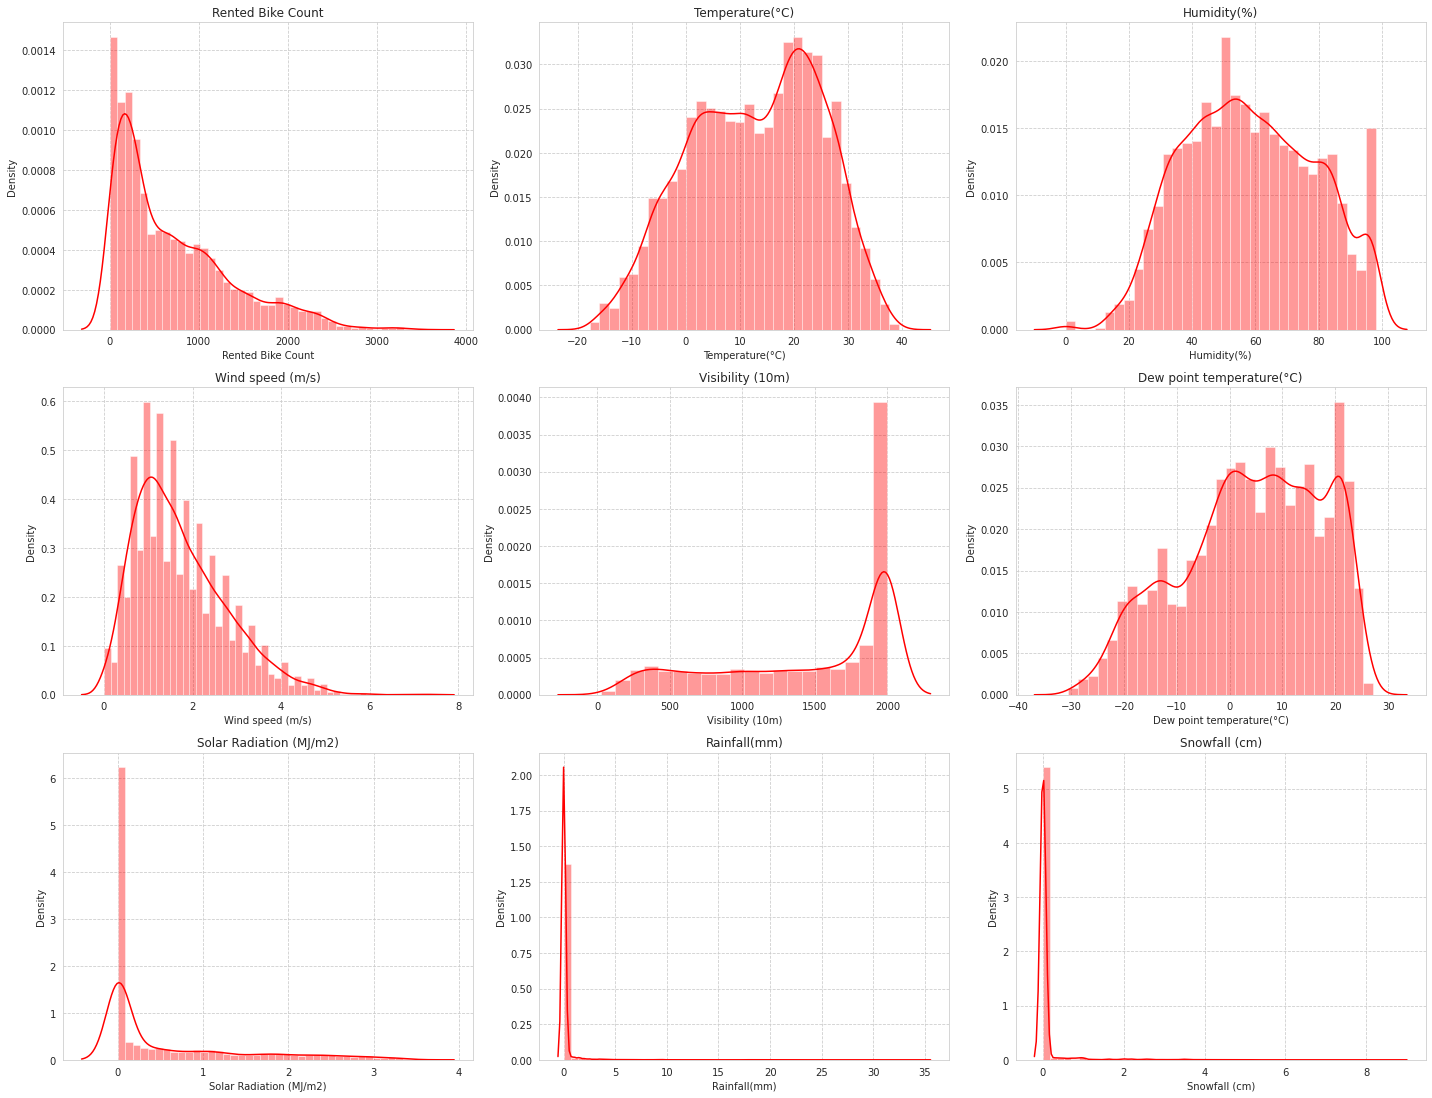

In [ ]:
# Distrubution of Data
n=1
plt.figure(figsize=(20,20))
for i in numeric_attributes.columns:
  plt.subplot(4,3,n) 
  n=n+1
  sns.distplot(byke1[i],color="r")
  plt.title(i)
  plt.tight_layout()

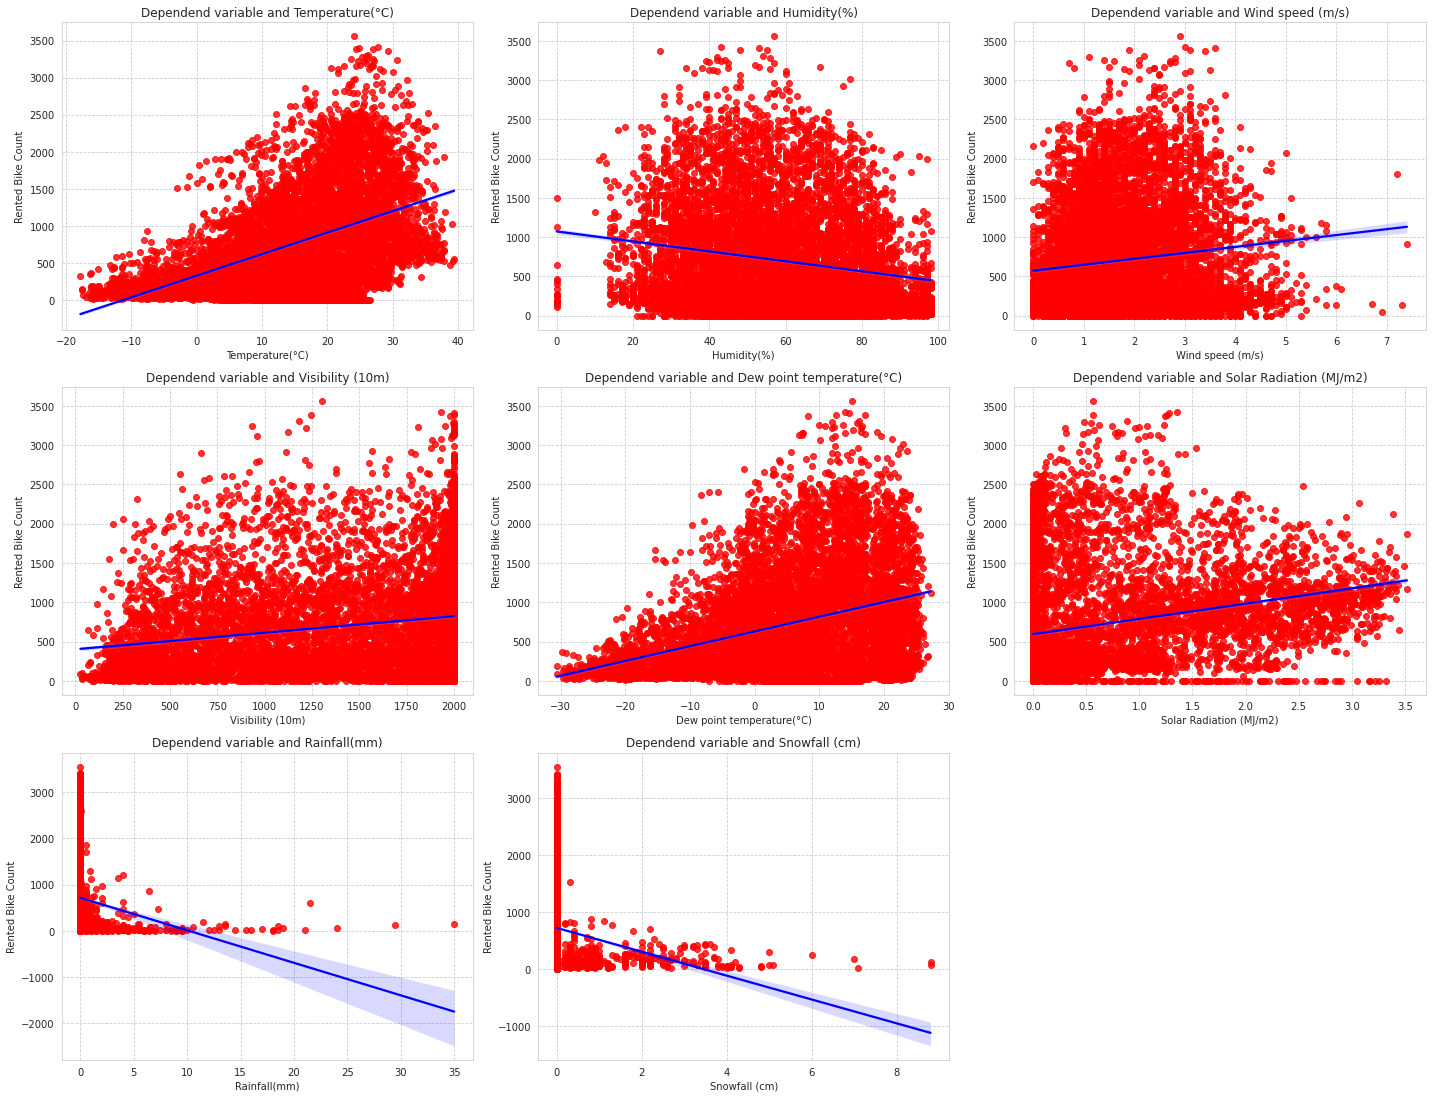

In [ ]:
#Relation with  independent variable
n=1
plt.figure(figsize=(20,20))
for i in numeric_attributes.columns:
  if i == 'Rented Bike Count':
    pass
  else:
    plt.subplot(4,3,n)
    n+=1
    sns.regplot(byke1[i], byke1['Rented Bike Count'],scatter_kws={"color": "red"}, line_kws={"color": "blue"})
    plt.title(f'Dependend variable and {i}')
    plt.tight_layout()

In [ ]:
byke2=pd.get_dummies(byke1,drop_first=True,sparse=True)
a = byke2.drop(columns='Rented Bike Count')
b = np.sqrt(byke2['Rented Bike Count'])

In [ ]:
a_train,a_test,b_train,b_test = train_test_split(a,b, test_size=0.25,random_state=50)

In [ ]:
yeo = PowerTransformer()
a_train = yeo.fit_transform(a_train)
a_test = yeo.transform(a_test)

**Linear Regression**

In [ ]:
# Fitting of model
regression = LinearRegression()
regression.fit(a_train,b_train)

LinearRegression()

In [ ]:
regression.score(a_train,b_train)

0.7842822134230286

In [ ]:
#predicting 
reg_pred_b_test = regression.predict(a_test)
reg_pred_b_train=regression.predict(a_train)

In [ ]:
# r2 score of train set
r2_linear_train = r2_score(b_train, reg_pred_b_train)
r2_linear_test = r2_score(b_test, reg_pred_b_test)

r2_linear_train 

0.7842822134230286

In [ ]:
r2_linear_test

0.786191153534766

**Lasso Rregression**

In [ ]:
LR= Lasso(alpha=0.0001, max_iter=1000)
LR.fit(a_train,b_train)
LR.score(a_train,b_train)

0.7842821927079088

In [ ]:
def score_metrics(actual,predicted):
  mae = mean_absolute_error(actual**2,predicted**2)
  print('mean absolute error is  :',mae)
  mse = mean_squared_error(actual**2,predicted**2)
  print('mean squared error is  :',mse)
  print('Root mean squared error is  :',np.sqrt(mse))
  print("R2 score is  :",r2_score(actual**2,predicted**2))

In [ ]:
LR_p = LR.predict(a_test)
score_metrics(b_test,LR_p)

mean absolute error is  : 223.45803602069194
mean squared error is  : 111089.6787440878
Root mean squared error is  : 333.30118323235484
R2 score is  : 0.7339316857182081


**Ridge** **Regression**

In [ ]:
R = Ridge()
attributes = {'alpha': [1e-15,1e-12,1e-9,1e-6,1e-3,1e-2,1e-1,0.5,1,1.5,2,2.5,3,6,9,12,15,20,25,30,35,40,45,50,55,60,65,70,80,90,100]}
ridge_regressor = GridSearchCV(R, attributes, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(a_train,b_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-12, 1e-09, 1e-06, 0.001, 0.01, 0.1,
                                   0.5, 1, 1.5, 2, 2.5, 3, 6, 9, 12, 15, 20, 25,
                                   30, 35, 40, 45, 50, 55, 60, 65, 70, 80, 90, ...]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -33.69300983988693


In [ ]:
R_p = ridge_regressor .predict(a_test)
score_metrics(b_test,R_p)

mean absolute error is  : 223.44890333323505
mean squared error is  : 111087.06276813321
Root mean squared error is  : 333.2972588668158
R2 score is  : 0.7339379511815736


**Decision Tree Regression**

In [ ]:
# training model
dt = DecisionTreeRegressor()
attributes = {'max_depth' : [0.5,1,1.5,2,2.5,3,3.5,4,4.5,6,6.5,7,7.5,8,8.5,9,9.5,10,12,14,16,18,20,24,28,32,36,40]}
g_dt=GridSearchCV(dt,attributes,scoring='r2',cv=6)
g_dt.fit(a_train,b_train)
b_dt=g_dt.best_estimator_
best_dt_testScore=b_dt.score(a_test,b_test)
r2_decision_test = b_dt.score(a_test,b_test)

In [ ]:
# extracting best parameters
print(f"R2 decision score is {g_dt.best_score_} with max depth {g_dt.best_params_['max_depth']}")
print('\n')
print(f"R2 test score is : {b_dt} with max depth = {g_dt.best_params_['max_depth']}")

R2 decision score is 0.7999721165097848 with max depth 20


R2 test score is : DecisionTreeRegressor(max_depth=20) with max depth = 20
